In [362]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import scipy as sp
import scipy.sparse.linalg
import time

import os 
  
os.chdir('/home/pdavid/Bureau/Code/Solution_splitting/Solution_splitting_cylindrical_vessel') 

from RHS_for_v import simplified_assembly_Laplacian_cylindrical
from RHS_for_v import matrix_coeff
from RHS_for_v import get_sec_der

This code under is for the meeting with Franck Boyer. Simple graph of the accurate well-block pressure. It is appropriate that it is here. It may be useful in the future

In [363]:
def oneD_Laplacian(inc_r, r):
    lenr=len(r)
    Lap=np.zeros([lenr, lenr])
    for i in np.arange(lenr-2)+1:
        Lap[i,i-1]=(r[i]-inc_r/2)/(r[i]*inc_r**2)
        Lap[i,i]=-2/inc_r**2
        Lap[i,i+1]=(r[i]+inc_r/2)/(r[i]*inc_r**2)
    
    Lap[0,0]=2/inc_r**2
    Lap[0,1]=-2/inc_r**2
    Lap[-1,-1]=-(r[-1]-inc_r/2)/(r[-1]*inc_r**2)
    Lap[-1,-2]=(r[-1]-inc_r/2)/(r[-1]*inc_r**2)
    return(Lap)
    

In [391]:
def plot_sol(Rm, nb_points, q, D):
    r=np.linspace(0,Rm,nb_points)
    inc_r=Rm/(nb_points-1)
    print(inc_r)
    lap=oneD_Laplacian(inc_r, r)
    RHS=np.zeros([lap.shape[0]])
    RHS[0]=q/(D*np.pi*inc_r**2)
    lap[-1,:]=0
    lap[-1,-1]=1

    sol=np.linalg.solve(lap,RHS)
    plt.plot(r,sol)
    return(sol)

def plot_comparison(r, sol, sol_num, r_num, inc_r_num, avg):
    plt.figure()
    c=0
    for i in r_num:
        plt.hlines(y = sol_num[c], xmin = r_num[c]-inc_r_num/2, xmax = r_num[c]+inc_r_num/2)  
        c+=1
    plt.plot(r, sol, 'r')
    
    plt.plot([-inc_r_num/2,inc_r_num/2], [avg,avg], 'g')
    
    plt.xlabel("r")
    plt.ylabel("concentration")
    
    plt.legend(["analytical", "average", "numerical"])
    

In [392]:
Rm=L=10

nb_points=100
Rv=Rm/nb_points
r_g=np.linspace(0,Rm,nb_points)

z=np.linspace(0,L,nb_points)



0.10101010101010101
1.1111111111111112


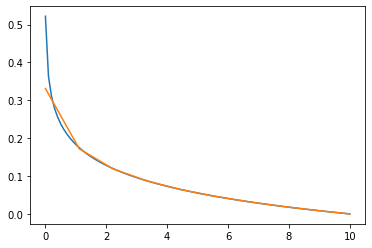

In [393]:
sol=plot_sol(Rm, nb_points, 1,1)
nb_points=nb_points//10
r_num=np.linspace(0,Rm,nb_points)

sol_num=plot_sol(Rm, nb_points, 1,1)
sol_num=np.concatenate([sol_num[::-1], sol_num])
r_num=np.concatenate([-r_num[::-1], r_num])
sol=np.concatenate([sol[::-1], sol])
r=np.concatenate([-r_g[::-1], r_g])

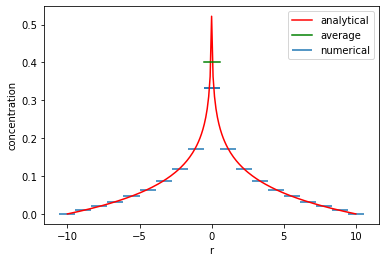

In [394]:
inc_r_num=Rm/(nb_points-1)
plot_comparison(r, sol, sol_num , r_num , inc_r_num,0.4)


In [368]:
r.shape

(200,)